In [26]:
import os
import torch
import torchvision
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
import torchvision.models as models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms as transforms
import torchvision.datasets as dset
from torchvision.datasets.folder import default_loader
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

In [27]:
batch_size = 100
image_size = (64,64)
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
workers=3
dataroot = r"C:\Users\henri\dsci478k\data"

In [28]:
transform_ds = transforms.Compose([transforms.Resize(image_size),
                                   #                                    transforms.RandomCrop(32, padding=2),
                                   #                                    transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize(*stats)
                                   ])

train_ds = torchvision.datasets.ImageFolder(root=dataroot,
                                            transform=transform_ds)
device = torch.device("cuda")
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
print(len(train_ds))

7338


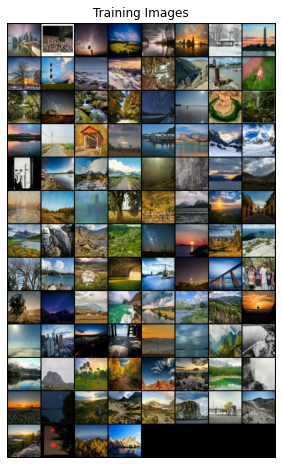

In [34]:
real_batch = next(iter(train_dl))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:100], padding=2, normalize=True).cpu(),(1,2,0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 64, 64])


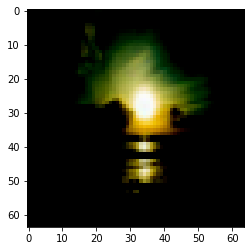

In [58]:
images,_ = train_ds[302]
print(images.size())
plt.imshow(np.transpose(images, (1, 2, 0)))
